#HEY READ THIS!

to have your copy of this notebook:
 - press file, on the top left corner
 - press save a copy in drive (requires Google account)
 - open with colab

# Hello everyone and welcome to the IWBDA 2024 LOICA tutorial.

In this notebook we will walk through some of the LOICA utilities.

Please visit our repository at: https://github.com/RudgeLab/LOICA

Logical Operators for Integrated Cell Algorithms (LOICA), a Python package for designing, modeling, and characterizing genetic networks based on a simple object-oriented design abstraction.

## First: Lets start installing all the necesary packages.

In [ ]:
pip install loica --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.0/824.0 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
pip install sbol3 --quiet

In [ ]:
pip install sbol_utilities --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.4/575.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 18.1 MB/s eta 0:00:00


## Now we need to import the packages

In [ ]:
import loica as lc
import sbol3
from sbol_utilities import component

import numpy as np
import getpass
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def gompertz_growth_rate(t, y0, ymax, um, l):
    A = np.log(ymax/y0)
    gr = um *np.exp((np.exp(1)* um *(l - t))/A - \
            np.exp((np.exp(1)* um *(l - t))/A + 1) + 2)
    return(gr)

def gompertz(t, y0, ymax, um, l):
    A = np.log(ymax/y0)
    log_rel_od = (A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1)))
    od = y0 * np.exp(log_rel_od)
    return(od)

def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 1)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 1)



# SBOL connection (optional)

To vinculate your designs with a sequences for synthesis or assembly we use SBOL.

pySBOL provides a way to handle SBOL in Python.

sbol-utilities provides high level abstraction functions to make it easy.

## Create Operators

In [ ]:
doc = sbol3.Document()
sbol3.set_namespace('https://github.com/Gonza10V')

ptet, ptet_seq = component.promoter('L3S2P21_UPA20_pTetR_RiboJ','GTCCCTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTtccctatcagtgatagagattgacatccctatcagtgatagagatactgagcacatcagcaggacgcactgaccAGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACGAAACAGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin pTet (based on B-P27-pTetR-F1)')
plac, plac_seq = component.promoter('L3S2P11_UPA20_pLac_RiboJ10', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTcctttcgtcttcacctcgagaattgtgagcggataacaattgacattgtgagcggataacaagatactgagcacatcagcaggacgcactgaccgaattcattAGCGCTCAACGGGTGTGCTTCCCGTTCTGATGAGTCCGTGAGGACGAAAGCGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin pLac (based on B-P39-pLac-F2)')
plam, plam_seq = component.promoter('L3S1P13_UPA20_plambda_RiboJ51', 'GTCCGACGAACAATAAGGCCTCCCTAACGGGGGGCCTTTTTTATTGATAACAAAAGTGCCTACTCTGGAAAATCTccgccgccctagacctagctgcaggtcgaggataaatatctaacaccgtgcgtgttgactattttacctctggcggtgataatggttgcatgtactagaattcattAGTAGTCACCGGCTGTGCTTGCCGGTCTGATGAGCCTGTGAAGGCGAAACTACCTCTACAAATAATTTTGTTTAAGGCTCG', description='BASIC - Potvin plambda (based on B-P41-pPhlF-F3)')

rbs1, rbs1_seq = component.rbs('RBS1', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAatcacacaggacta', description='BASIC Linker RBS1')
rbs2, rbs2_seq = component.rbs('RBS2', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAaaagaggggaaata', description='BASIC Linker RBS2')
rbs3, rbs3_seq = component.rbs('RBS3', 'ttgaacaccgtcTCAGGTAAGTATCAGTTGTAAaaagaggagaaata', description='BASIC Linker RBS3')

op_ptet = component.engineered_region('operator_ptet', [ptet, rbs1], description= 'LOICA Operator pTet')
op_plac = component.engineered_region('operator_plac', [plac, rbs2], description='LOICA Operator pLac')
op_plam = component.engineered_region('operator_plam', [plam, rbs3], description='LOICA Operator pLambda')

toplevels = [ptet, ptet_seq, plac, plac_seq, plam, plam_seq, rbs1, rbs2, rbs3, rbs1_seq, rbs2_seq, rbs3_seq, op_ptet, op_plac, op_plam]
doc.add(toplevels)

operators = [op_ptet, op_plac, op_plam]

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ
https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ_seq
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS2
https://github.com/Gonza10V/RBS3
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/RBS2_seq
https://github.com/Gonza10V/RBS3_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/operator_plac
https://github.com/Gonza10V/operator_plam
0


## Create GeneProducts

In [ ]:
gfp, gfp_seq = component.cds('GFP', 'GTCCatgcgtaaaggagaagaacttttcactggagttgtcccaattcttgttgaattagatggtgatgttaatgggcacaaattttctgtcagtggagagggtgaaggtgatgcaacatacggaaaacttacccttaaatttatttgcactactggaaaactacctgttccatggccaacacttgtcactactttcggttatggtgttcaatgctttgcgagatacccagatcatatgaaacagcatgactttttcaagagtgccatgcccgaaggttatgtacaggaaagaactatatttttcaaagatgacgggaactacaagacacgtgctgaagtcaagtttgaaggtgatacccttgttaatagaatcgagttaaaaggtattgattttaaagaagatggaaacattcttggacacaaattggaatacaactataactcacacaatgtatacatcatggcagacaaacaaaagaatggaatcaaagttaacttcaaaattagacacaacattgaagatggaagcgttcaactagcagaccattatcaacaaaatactccaattggcgatggccctgtccttttaccagacaaccattacctgtccacacaatctgccctttcgaaagatcccaacgaaaagagagaccacatggtccttcttgagtttgtaacagctgctgggattacacatggcatggatgaactatacaaaGGCTCG ', description='GFP Coding Sequence from BBa_E0040, no BasI site, no stop codon')
tetr, tetr_seq = component.cds('TetR', 'GTCCatgtccagattagataaaagtaaagtgattaacagcgcattagagctgcttaatgaggtcggaatcgaaggtttaacaacccgtaaactcgcccagaagctaggtgtagagcagcctacattgtattggcatgtaaaaaataagcgggctttgctcgacgccttagccattgagatgttagataggcaccatactcacttttgccctttagaaggggaaagctggcaagattttttacgtaataacgctaaaagttttagatgtgctttactaagtcatcgcgatggagcaaaagtacatttaggtacacggcctacagaaaaacagtatgaaactctcgaaaatcaattagcctttttatgccaacaaggtttttcactagagaatgcattatatgcactcagcgctgtggggcattttactttaggttgcgtattggaagatcaagagcatcaagtcgctaaagaagaaagggaaacacctactactgatagtatgccgccattattacgacaagctatcgaattatttgatcaccaaggtgcagagccagccttcttattcggccttgaattgatcatatgcggattagaaaaacaacttaaatgtgaaagtgggtctGGCTCG',description='TetR Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
laci, laci_seq = component.cds('LacI', 'GTCCatggtgaatgtgaaaccagtaacgttatacgatgtcgcagagtatgccggtgtctcttatcagaccgtttcccgcgtggtgaaccaggccagccacgtttctgcgaaaacgcgggaaaaagtggaagcggcgatggcggagctgaattacattcccaaccgcgtggcacaacaactggcgggcaaacagtcgttgctgattggcgttgccacctccagtctggccctgcacgcgccgtcgcaaattgtcgcggcgattaaatctcgcgccgatcaactgggtgccagcgtggtggtgtcgatggtagaacgaagcggcgtcgaagcctgtaaagcggcggtgcacaatcttctcgcgcaacgcgtcagtgggctgatcattaactatccgctggatgaccaggatgccattgctgtggaagctgcctgcactaatgttccggcgttatttcttgatgtctctgaccagacacccatcaacagtattattttctcccatgaagacggtacgcgactgggcgtggagcatctggtcgcattgggtcaccagcaaatcgcgctgttagcgggcccattaagttctgtctcggcgcgtctgcgtctggctggctggcataaatatctcactcgcaatcaaattcagccgatagcggaacgggaaggcgactggagtgccatgtccggttttcaacaaaccatgcaaatgctgaatgagggcatcgttcccactgcgatgctggttgccaacgatcagatggcgctgggcgcaatgcgcgccattaccgagtccgggctgcgcgttggtgcggatatctcggtagtgggatacgacgataccgaagacagctcatgttatatcccgccgttaaccaccatcaaacaggattttcgcctgctggggcaaaccagcgtggaccgcttgctgcaactctctcagggccaggcggtgaagggcaatcagctgttgcccgtctcactggtgaaaagaaaaaccaccctggcgcccaatacgcaaaccgcctctccccgcgcgttggccgattcattaatgcagctggcacgacaggtttcccgactggaaagcgggcagGGCTCG', description='LacI Coding Sequence from Potvin-Trottier pLPT119, no stop codon')
lamr, lamr_seq = component.cds('LamR', 'GTCCCTCGGTACCAAATTCCAGAAAAGAGGCCTCCCGAAAGGGGGGCCTTTTTTCGTTTTGGTCCGTGCCTACTCTGGAAAATCTtccctatcagtgatagagattgacatccctatcagtgatagagatactgagcacatcagcaggacgcactgaccAGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACGAAACAGCCTCTACAAATAATTTTGTTTAAGGCTCG', description='lambdaR Coding Sequence from Potvin-Trottier pLPT119, no stop codon')

m0050, m0050_seq = component.protein_stability_element('M0050', 'gctgctaacgacgaaaactacgctctggctgctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0050')
m0052, m0052_seq = component.protein_stability_element('M0052', 'gctgctaacgacgaaaactacgctgacgcttctTAAattgaacta', description='http://parts.igem.org/wiki/index.php?title=Part:BBa_M0052')

ter1, ter1_seq = component.terminator('TER1', 'GTCCatttgtcctactcaggagagcgttcaccgacaaacaacagataaaacgaaaggcccagtctttcgactgagcctttcgttttatttgTAAGGCTCG', description='rrnB T1 terminator from Potvin-Trottier pLPT119, extra stop codon')

toplevels = [gfp, gfp_seq, tetr, tetr_seq, laci, laci_seq, lamr, lamr_seq, m0050, m0050_seq, m0052, m0052_seq, ter1, ter1_seq]
doc.add(toplevels)

# Automate design from lists of components, could be a collection
rbss = [rbs1] # [rbs1, rbs2, rbs3]
cdss = [gfp, tetr, laci, lamr]
degtags = [m0050, m0052] # [m0050, m0051, m0052]
terminators = [ter1]

# Wrap it together
geneproducts = []
for rbs in rbss:
    for cds in cdss:
        for degtag in degtags:
            for ter in terminators:
                geneproduct = component.engineered_region(f'geneproduct_{cds.display_id}_{degtag.display_id}_{ter.display_id}', [rbs, cds, degtag, ter], description='LOICA gene product')
                doc.add(geneproduct)
                geneproducts.append(geneproduct)

for obj in doc.objects:
    print(obj.identity)
report_sbol3 = doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ
https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ_seq
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS2
https://github.com/Gonza10V/RBS3
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/RBS2_seq
https://github.com/Gonza10V/RBS3_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/operator_plac
https://github.com/Gonza10V/operator_plam
https://github.com/Gonza10V/GFP
https://github.com/Gonza10V/GFP_seq
https://github.com/Gonza10V/TetR
https://github.com/Gonza10V/TetR_seq
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/LamR
https://github.com/Gonza10V/LamR_seq
https://github.com/Gonza10V/M0050
https:

## Save SBOL parts (optional)

In [ ]:
doc.write('rep_parts.xml', sbol3.RDF_XML)

# Genetic Network Design

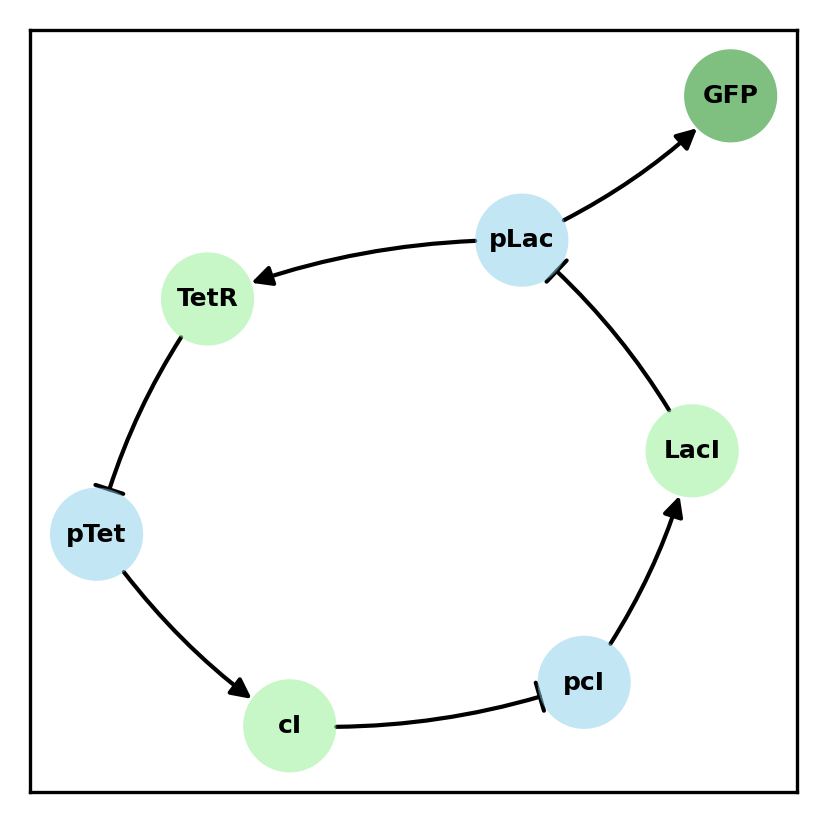

In [ ]:
rep = lc.GeneticNetwork(vector=0)

tetr_reg = lc.Regulator(name='TetR', degradation_rate=1, sbol_comp=geneproducts[3])
laci_reg = lc.Regulator(name='LacI', degradation_rate=1, init_concentration=5, sbol_comp=geneproducts[4])
ci_reg = lc.Regulator(name='cI', degradation_rate=1, sbol_comp=geneproducts[5])
rep.add_regulator([tetr_reg, laci_reg, ci_reg])

gfp_rep = lc.Reporter(name='GFP', degradation_rate=1, signal_id=0, sbol_comp=geneproducts[0], color='green')
rep.add_reporter(gfp_rep)

laci_not_tetr_gfp = lc.Hill1(name='pLac', input=laci_reg, output=[tetr_reg, gfp_rep], alpha=[10000,0.1], K=10, n=2, sbol_comp=op_plac, )
ci_not_laci = lc.Hill1(name='pcI', input=ci_reg, output=laci_reg, alpha=[10000,0.1], K=10, n=2, sbol_comp=op_plam)
tetr_not_ci = lc.Hill1(name='pTet', input=tetr_reg, output=ci_reg, alpha=[10000,0.1], K=10, n=2, sbol_comp=op_ptet)
rep.add_operator([laci_not_tetr_gfp, ci_not_laci, tetr_not_ci])

plt.figure(figsize=(3.3,3.3), dpi=300)
rep.draw()

## Alternative visualization

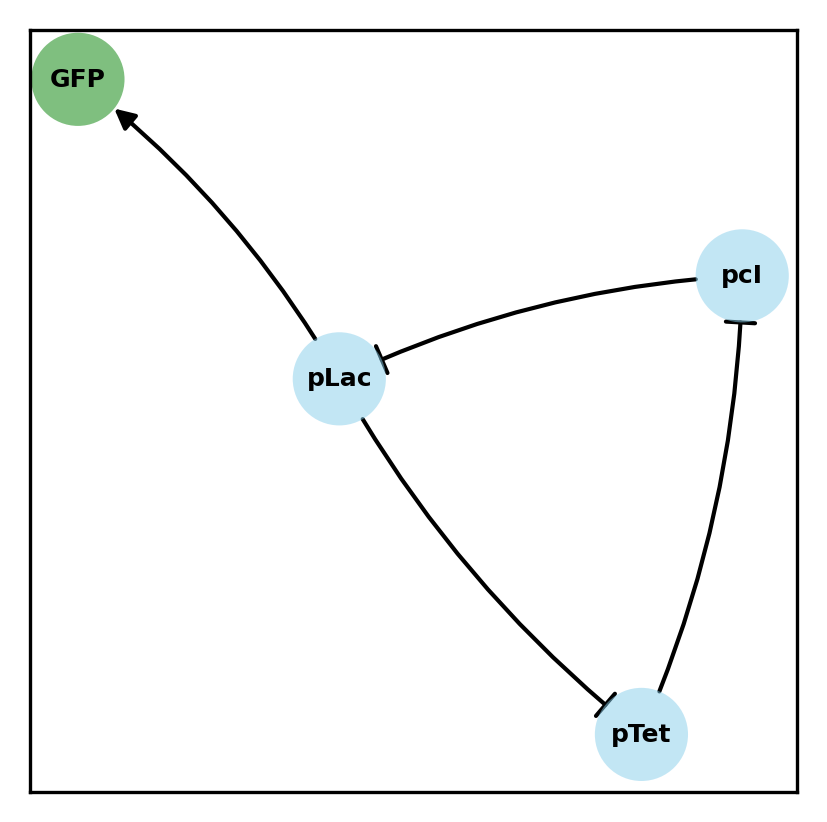

In [ ]:
plt.figure(figsize=(3.3,3.3), dpi=300)
rep.draw(contracted=True)

# Export SBOL model

In [ ]:
repressilator_doc = rep.to_sbol(sbol_doc=doc)
for obj in repressilator_doc.objects:
    print(obj.identity)
report_sbol3 = repressilator_doc.validate()
print(len(report_sbol3))

https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ
https://github.com/Gonza10V/L3S2P21_UPA20_pTetR_RiboJ_seq
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10
https://github.com/Gonza10V/L3S2P11_UPA20_pLac_RiboJ10_seq
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51
https://github.com/Gonza10V/L3S1P13_UPA20_plambda_RiboJ51_seq
https://github.com/Gonza10V/RBS1
https://github.com/Gonza10V/RBS2
https://github.com/Gonza10V/RBS3
https://github.com/Gonza10V/RBS1_seq
https://github.com/Gonza10V/RBS2_seq
https://github.com/Gonza10V/RBS3_seq
https://github.com/Gonza10V/operator_ptet
https://github.com/Gonza10V/operator_plac
https://github.com/Gonza10V/operator_plam
https://github.com/Gonza10V/GFP
https://github.com/Gonza10V/GFP_seq
https://github.com/Gonza10V/TetR
https://github.com/Gonza10V/TetR_seq
https://github.com/Gonza10V/LacI
https://github.com/Gonza10V/LacI_seq
https://github.com/Gonza10V/LamR
https://github.com/Gonza10V/LamR_seq
https://github.com/Gonza10V/M0050
https:

# Save SBOL model (optional)

In [ ]:
doc.write('rep_loica_model.xml', sbol3.RDF_XML)

# Assay Setup

Define the context where the Genetic Network runs

In [ ]:
metab = lc.SimulatedMetabolism('LOICA metab', biomass, growth_rate)

sample = lc.Sample(genetic_network=rep,
                metabolism=metab,
                media=0,
                strain=0
               )
assay = lc.Assay([sample],
              n_measurements=100,
              interval=0.25,
              name='LOICA repressilator IWBDA2023',
              description='Simulated repressilator generated by LOICA',
              biomass_signal_id=0
             )
assay.run() #assay.run(nsr=1e-3)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

After running the Assay you will get measurements of the simulation

In [ ]:
assay.measurements

,Time,Signal_id,Signal,Measurement,Sample
0,0.00,0,GFP,0.000000,0
1,0.00,0,Biomass,0.011270,0
2,0.25,0,GFP,1.853683,0
3,0.25,0,Biomass,0.012180,0
4,0.50,0,GFP,1.542343,0
...,...,...,...,...,...
195,24.25,0,Biomass,0.999990,0
196,24.50,0,GFP,139.414727,0
197,24.50,0,Biomass,0.999991,0
198,24.75,0,GFP,147.690889,0


This data can be uploaded to Flapjack, to access

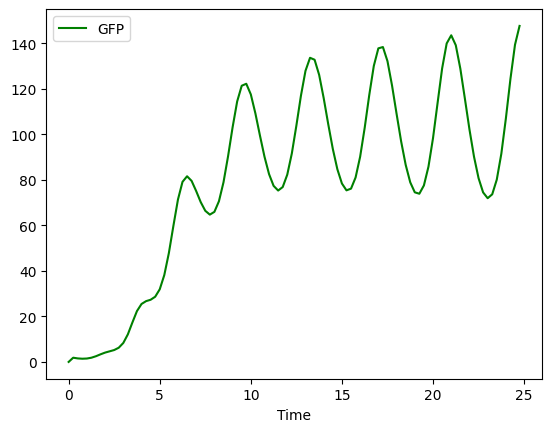

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='GFP'].plot(x='Time', y='Measurement', ax=ax, label='GFP', color='g')
plt.savefig('LOICARepressilator.png', dpi=300)

# Spatio-Temporal Dynamics

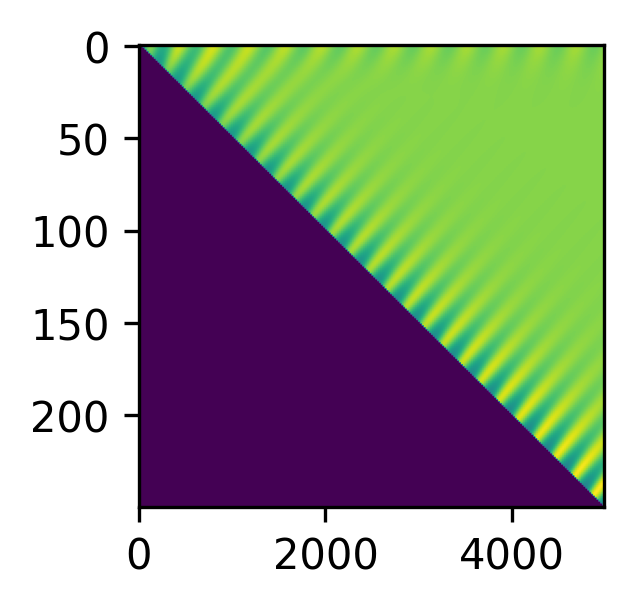

In [ ]:
col = lc.Colony(rep, 1, 1)
kymo = col.kymograph(nx=250, t0=0, tmax=48)#nx=500, t0=0, tmax=48

plt.figure(figsize=(2,2), dpi=300)
plt.imshow(col.map_kymo(col.norm_kymo(kymo))[:,:,0], aspect='auto')

# Triple Reporter Repressilator

# Genetic Network Design

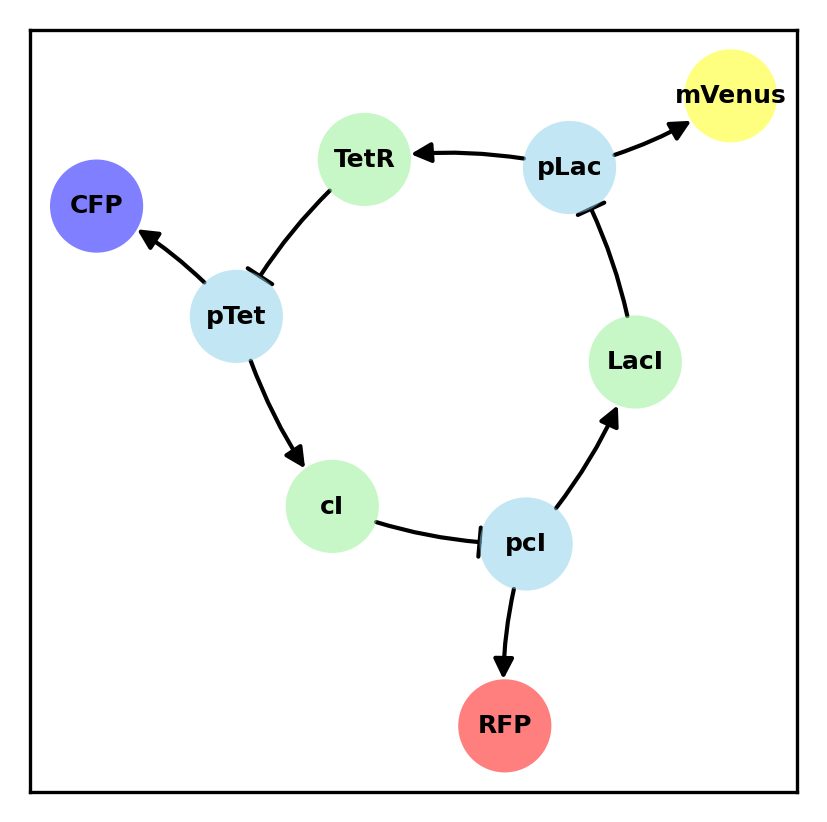

In [ ]:
rep = lc.GeneticNetwork(vector=0)

tetr_reg = lc.Regulator(name='TetR', degradation_rate=0.5, sbol_comp=geneproducts[3])
laci_reg = lc.Regulator(name='LacI', degradation_rate=0.5, init_concentration=5, sbol_comp=geneproducts[4])
ci_reg = lc.Regulator(name='cI', degradation_rate=0.5, sbol_comp=geneproducts[5])
rep.add_regulator([tetr_reg, laci_reg, ci_reg])

mven_rep = lc.Reporter(name='mVenus', degradation_rate=0.5, signal_id=0, sbol_comp=geneproducts[0], color='yellow')
rfp_rep = lc.Reporter(name='RFP', degradation_rate=0.5, signal_id=0, sbol_comp=geneproducts[1], color='red')
cfp_rep = lc.Reporter(name='CFP', degradation_rate=0.5, signal_id=0, sbol_comp=geneproducts[2], color='blue')
rep.add_reporter([mven_rep, rfp_rep, cfp_rep])

laci_not_tetr = lc.Hill1(name='pLac', input=laci_reg, output=[tetr_reg, mven_rep], alpha=[10000,0.1], K=10, n=2, sbol_comp=op_plac, )
ci_not_laci = lc.Hill1(name='pcI', input=ci_reg, output=[laci_reg, rfp_rep], alpha=[10000,0.1], K=10, n=2, sbol_comp=op_plam)
tetr_not_ci = lc.Hill1(name='pTet', input=tetr_reg, output=[ci_reg, cfp_rep], alpha=[10000,0.1], K=10, n=2, sbol_comp=op_ptet)
rep.add_operator([laci_not_tetr, ci_not_laci, tetr_not_ci])

plt.figure(figsize=(3.3,3.3), dpi=300)
rep.draw()

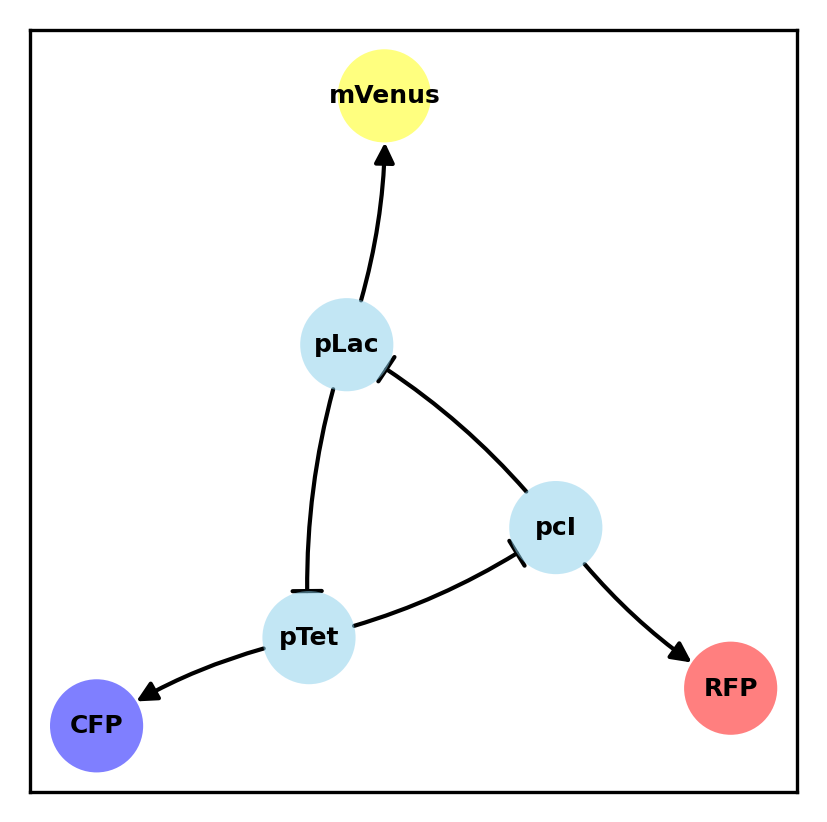

In [ ]:
plt.figure(figsize=(3.3,3.3), dpi=300)
rep.draw(contracted=True)

# Assay Setup

In [ ]:
metab = lc.SimulatedMetabolism('LOICA metab', biomass, growth_rate)

sample = lc.Sample(genetic_network=rep,
                metabolism=metab,
                media=0,
                strain=0
               )
assay = lc.Assay([sample],
              n_measurements=100,
              interval=0.25,
              name='LOICA triple repressilator',
              description='Simulated repressilator generated by LOICA',
              biomass_signal_id=0
             )
assay.run(nsr=1e-3)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

In [ ]:
assay.measurements

,Time,Signal_id,Signal,Measurement,Sample
0,0.00,0,mVenus,0.000000,0
1,0.00,0,RFP,0.000000,0
2,0.00,0,CFP,0.000000,0
3,0.00,0,Biomass,0.011079,0
4,0.25,0,mVenus,2.165992,0
...,...,...,...,...,...
395,24.50,0,Biomass,1.023237,0
396,24.75,0,mVenus,148.058848,0
397,24.75,0,RFP,99.570130,0
398,24.75,0,CFP,139.904432,0


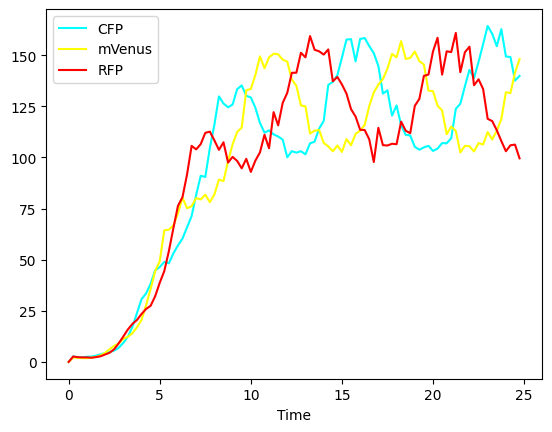

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
m[m.Signal=='CFP'].plot(x='Time', y='Measurement', ax=ax, label='CFP', color='cyan')
m[m.Signal=='mVenus'].plot(x='Time', y='Measurement', ax=ax, label='mVenus', color='yellow')
m[m.Signal=='RFP'].plot(x='Time', y='Measurement', ax=ax, label='RFP', color='red')
plt.savefig('LOICARepressilator.png', dpi=300)

# Spatio-Temporal Dynamics

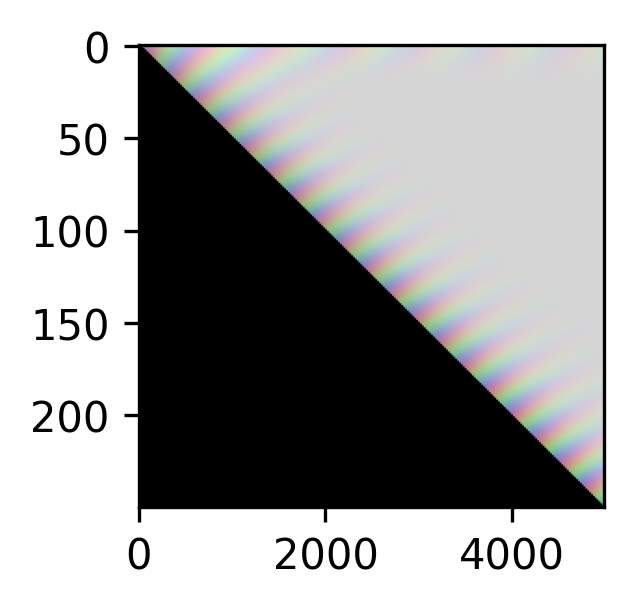

In [ ]:
col = lc.Colony(rep, 1, 1)
kymo = col.kymograph(nx=250, t0=0, tmax=48)#nx=500, t0=0, tmax=48

plt.figure(figsize=(2,2), dpi=300)
plt.imshow(col.map_kymo(col.norm_kymo(kymo)), aspect='auto')

# Individual Based Modeling (IBM) using CellModeller

[CellModeller Videos](https://youtube.com/playlist?list=PL-TuihR6v8--g-hyG-mHja8O2_tuCWE5F)

Extra circuit for fun

# Tigges

In [ ]:
osc = lc.GeneticNetwork()

acts = [lc.Regulator(name=f'Act{i}', degradation_rate=0.75) for i in range(3)]
osc.add_regulator(acts)

rep = lc.Regulator(name='Rep', degradation_rate=0.75)
osc.add_regulator(rep)

reporters = [lc.Reporter(name=f'SFP{i}', color='blue', degradation_rate=0.75) for i in range(3)]
osc.add_reporter(reporters)

op1 = lc.Hill2([rep,acts[0]], [acts[0],acts[1],reporters[0]], alpha=[1,0,100,0], K=[10,10], n=[2,2])
op2 = lc.Hill1(acts[1], [acts[2], reporters[1]], alpha=[1,100], K=10, n=2)
op3 = lc.Hill1(acts[2], [rep, reporters[2]], alpha=[1,100], K=10, n=2)
osc.add_operator([op1,op2,op3])

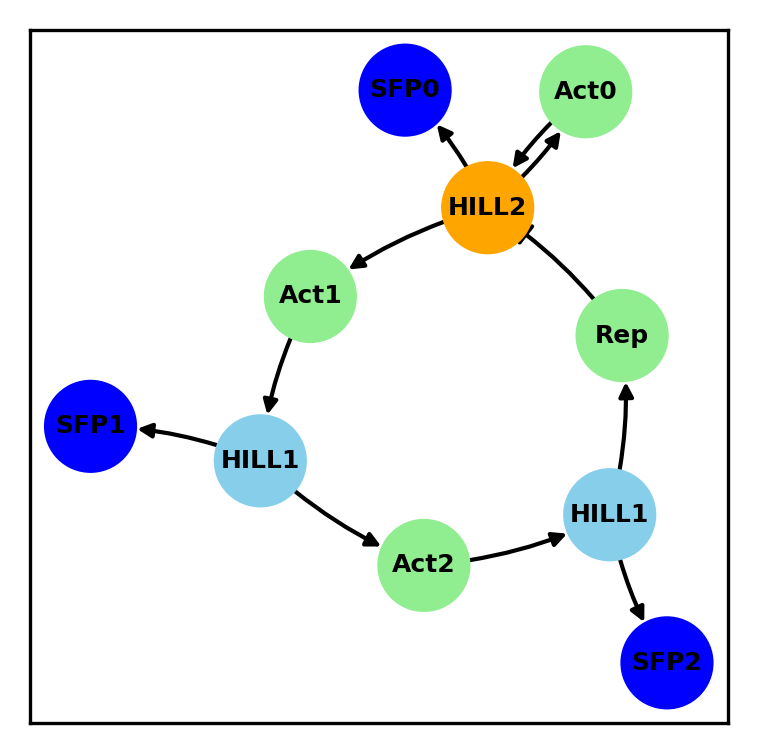

In [ ]:
plt.figure(figsize=(3,3), dpi=300)
osc.draw(contracted=False, arrowsize=7, node_size=500, linewidths=0, alpha=1)

In [ ]:
def growth_rate(t):
    return gompertz_growth_rate(t, 0.01, 1, 1, 0.5)

def biomass(t):
    return gompertz(t, 0.01, 1, 1, 0.5)

metab = lc.SimulatedMetabolism('LOICA gompertz metab', biomass, growth_rate)

acts[0].init_concentration = 100

sample = lc.Sample(genetic_network=osc,
                    metabolism=metab)

assay = lc.Assay([sample],
              n_measurements=500,
              interval=0.1,
              name=f'Loica Tigges oscillator',
              description='Simulated oscillator generated by loica'
             )
assay.run(stochastic=False)

  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:89: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.measurements = self.measurements.append(row, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/loica/assay.py:103: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

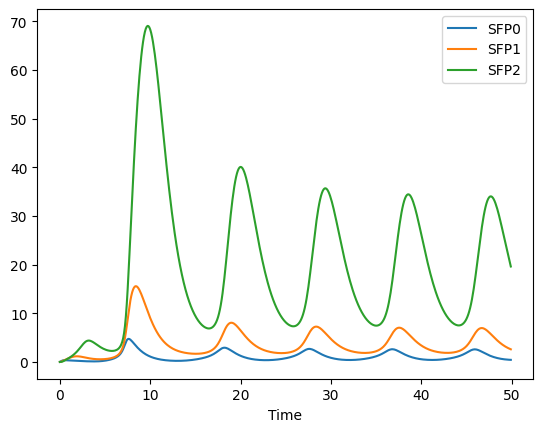

In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
for i in range(3):
    m[m.Signal==f'SFP{i}'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend([f'SFP{i}' for i in range(3)])

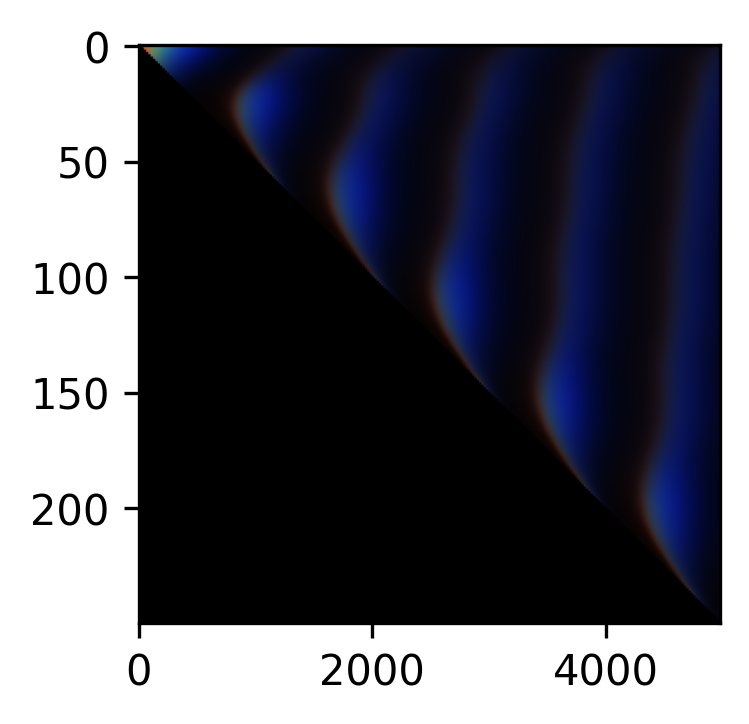

In [ ]:
col = lc.Colony(osc, 1, 1)
kymo = col.kymograph(nx=250, t0=0, tmax=48)#nx=500, t0=0, tmax=48

plt.figure(figsize=(2.5,2.5), dpi=300)
plt.imshow(col.map_kymo(col.norm_kymo(kymo)), aspect='auto')

Thanks for your attention.